In [272]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

In [273]:
df = pd.DataFrame()

for i in range(1,30000,1000):
    url = 'http://openapi.seoul.go.kr:8088/72734e5947776f6f35336c4d464a61/json/BukChonInOutPeopleInfo/{}/{}/'.format(i, i+999)
    response = requests.get(url)
    dict_data = json.loads(response.text)
    specialdf = pd.DataFrame(dict_data['BukChonInOutPeopleInfo']['row'])
    df = pd.concat([df ,specialdf])

In [274]:
df['Year'] = df['STARTTIME'].str.split(' ').str[0]
df['Time'] = df['STARTTIME'].str.split(' ').str[1]

In [275]:
df['MONTH'] = df['Year'].str.split('-').str[1]
df['Date'] = df['Time'].str.split(':').str[0]

In [276]:
df

,DEVICEID,DEVICENAME,DESCRIPTION,STARTTIME,ENDTIME,INCOUNT,OUTCOUNT,Year,Time,MONTH,Date
0,2.0,계동길 69,계동교회 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,9386.0,13749.0,2022-11-30,21:10:41,11,21
1,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:10:41,2022-11-30 21:20:41,7903.0,5279.0,2022-11-30,21:10:41,11,21
2,2.0,계동길 69,계동교회 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,9398.0,13776.0,2022-11-30,21:20:41,11,21
3,1.0,율곡로3길 50,덕성여고 앞,2022-11-30 21:20:41,2022-11-30 21:30:41,7927.0,5312.0,2022-11-30,21:20:41,11,21
4,2.0,계동길 69,계동교회 앞,2022-11-30 21:30:41,2022-11-30 21:40:41,9414.0,13800.0,2022-11-30,21:30:41,11,21
...,...,...,...,...,...,...,...,...,...,...,...
311,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 19:10:41,2023-01-30 19:20:41,5469.0,4227.0,2023-01-30,19:10:41,01,19
312,2.0,계동길 69,계동교회 앞,2023-01-30 19:20:41,2023-01-30 19:30:41,2807.0,4373.0,2023-01-30,19:20:41,01,19
313,1.0,율곡로3길 50,덕성여고 앞,2023-01-30 19:20:41,2023-01-30 19:30:41,5577.0,4303.0,2023-01-30,19:20:41,01,19
314,2.0,계동길 69,계동교회 앞,2023-01-30 19:30:41,2023-01-30 19:40:41,2825.0,4398.0,2023-01-30,19:30:41,01,19


# 한글폰트 설정(시각화 할떄)

In [277]:
plt.rc('font', family = 'Malgun Gothic')

# 1. 월별 유동인구

In [278]:
df1 = pd.DataFrame(df.groupby('MONTH')['INCOUNT', 'OUTCOUNT'].sum().round())

C:\Users\User\AppData\Local\Temp\ipykernel_32344\1454869311.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = pd.DataFrame(df.groupby('MONTH')['INCOUNT', 'OUTCOUNT'].sum().round())


In [279]:
df1['Sum'] = df1['INCOUNT'] + df1['OUTCOUNT']

In [280]:
df1

,INCOUNT,OUTCOUNT,Sum
MONTH,,,
01,19943765.0,21732696.0,41676461.0
10,8875053.0,9602168.0,18477221.0
11,54394522.0,59923628.0,114318150.0
12,23064041.0,24228120.0,47292161.0


In [281]:
Df1 = df1.loc[:,['Sum']]

In [282]:
Df1

,Sum
MONTH,
01,41676461.0
10,18477221.0
11,114318150.0
12,47292161.0


<AxesSubplot:xlabel='MONTH'>

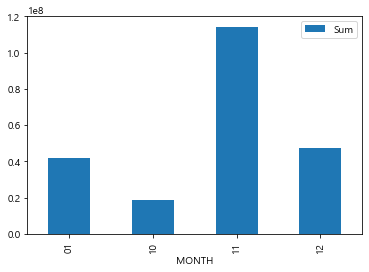

In [283]:
Df1.plot.bar()


# 2 . 요일별 유동인구

In [284]:
df['Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 29316 entries, 0 to 315
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
29316 non-null  object
dtypes: object(1)
memory usage: 458.1+ KB


In [285]:
df['Year'] = pd.to_datetime(df['Year'])

In [286]:
df['Year'].info()

<class 'pandas.core.series.Series'>
Int64Index: 29316 entries, 0 to 315
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
29316 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 458.1 KB


In [287]:
list = ['월', '화', '수', '목', '금', '토', '일']
df['weekday'] = df['Year'].dt.weekday
df['요일'] = df.apply(lambda x : list[x['weekday']], axis = 1)

In [288]:
df2 = pd.DataFrame(df.groupby(['요일'])['INCOUNT','OUTCOUNT'].sum().round())

C:\Users\User\AppData\Local\Temp\ipykernel_32344\2354999474.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = pd.DataFrame(df.groupby(['요일'])['INCOUNT','OUTCOUNT'].sum().round())


In [289]:
df2['Sum'] = abs(df2['INCOUNT'] + df2['OUTCOUNT']).round()

In [290]:
Df2 = df2.loc[:,['Sum']]

In [291]:
list1 = ['월', '화', '수', '목', '금', '토', '일']

Df2 = Df2.loc[list1]

In [292]:
Df2

,Sum
요일,
월,31568169.0
화,30756699.0
수,31936730.0
목,35233503.0
금,35943699.0
토,29451524.0
일,26873669.0


<AxesSubplot:xlabel='요일'>

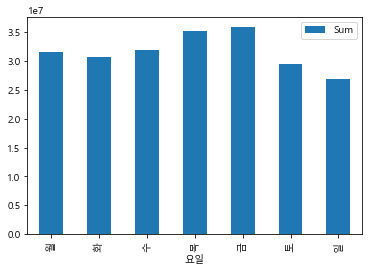

In [293]:
Df2.plot.bar()

# 3. 시간별 유동인구

In [294]:
df['Hour'] = df['Date']

In [295]:
df3 = pd.DataFrame(df.groupby(['Hour'])['INCOUNT','OUTCOUNT'].sum().round())

C:\Users\User\AppData\Local\Temp\ipykernel_32344\1977737670.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = pd.DataFrame(df.groupby(['Hour'])['INCOUNT','OUTCOUNT'].sum().round())


In [296]:
df3['Sum'] = df3['INCOUNT'] + df3['OUTCOUNT']

In [297]:
df3

,INCOUNT,OUTCOUNT,Sum
Hour,,,
00,45256.0,51977.0,97233.0
01,104875.0,129749.0,234624.0
02,151429.0,206078.0,357507.0
03,189440.0,275493.0,464933.0
04,230607.0,350658.0,581265.0
05,289265.0,448102.0,737367.0
06,379662.0,566922.0,946584.0
07,721789.0,854376.0,1576165.0
08,1397797.0,1406150.0,2803947.0


In [298]:
Df3 = df3.loc[:,['Sum']]

In [299]:
Df3

,Sum
Hour,
00,97233.0
01,234624.0
02,357507.0
03,464933.0
04,581265.0
05,737367.0
06,946584.0
07,1576165.0
08,2803947.0


<AxesSubplot:xlabel='Hour'>

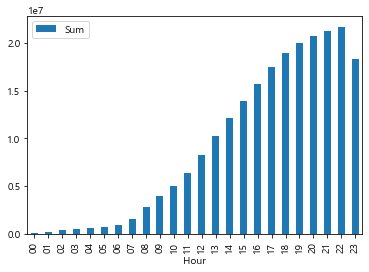

In [300]:
Df3.plot.bar()